In [1]:
import scanpy as sc
adata = sc.read('../data/xenium/improved_outs/grouped_filtered_voronoi_tresholded_adata.h5ad')

In [2]:
adata

AnnData object with n_obs × n_vars = 107864 × 541
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
import pandas as pd
csv_data = pd.read_csv('../data/xenium/41467_2023_43458_MOESM4_ESM.csv')

In [4]:
csv_data

Genes    DCIS_1    DCIS_2  Prolif_Invasive_Tumor  Invasive_Tumor   
0    SERPINA3  2.327150  1.637294              -0.531378       -0.544919  \
1        ESR1  3.572079  1.791021               0.300844       -0.042592   
2     CEACAM6  3.621209  1.786169              -0.422193       -0.382355   
3     CEACAM8  3.330266  2.191152               0.004957        0.029682   
4        AGR3  2.219148  3.213558               0.083560       -0.248952   
..        ...       ...       ...                    ...             ...   
308     PPARG -0.338426 -0.507219               0.316962       -0.141006   
309     TCF15 -0.431056 -0.359757              -0.238780       -0.325422   
310      TCF4 -0.705485 -0.731847              -0.684185       -0.685841   
311    AKR1C1  0.298755 -0.465756              -0.794885       -0.797805   
312    AKR1C3 -0.673172 -0.595774              -0.650234       -0.715268   

     Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
0         2.075936       1.664456              -0.502572     -0.538760  \
1         0.431788      -0.202569              -0.396183     -0.562775   
2         0.341947       0.349583              -0.382157     -0.461351   
3         0.223742       0.457422              -0.379674     -0.500369   
4         0.960034      -0.119078              -0.398760     -0.508153   
..             ...            ...                    ...           ...   
308      -0.559448      -0.584905              -0.120495     -0.537300   
309      -0.330731      -0.402823               0.306865     -0.162181   
310      -0.396396      -0.716368              -0.583386     -0.497069   
311       0.059594       2.073501              -0.855245     -0.795098   
312      -0.264523       0.956717              -0.680866     -0.624022   

     CD4+_T_Cells  ...  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells   
0       -0.589960  ...                -0.502320  -0.536950 -0.521432  \
1       -0.591560  ...                -0.545251  -0.544589 -0.262311   
2       -0.501984  ...                -0.433649  -0.389543 -0.414885   
3       -0.529298  ...                -0.526940  -0.497042 -0.495499   
4       -0.529606  ...                -0.472275  -0.485073 -0.449064   
..            ...  ...                      ...        ...       ...   
308     -0.639934  ...                -0.572286  -0.500312 -0.480455   
309     -0.415775  ...                 0.046680  -0.648853 -0.310222   
310     -0.582606  ...                -0.423529   2.517738  0.249668   
311     -0.837757  ...                -0.140717   0.982352 -0.742926   
312     -0.564892  ...                -0.317868   1.740663 -0.433759   

     Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
0        -0.458220      -0.473244   -0.554848   -0.426263 -0.244188  \
1        -0.392398      -0.239356   -0.623361   -0.279893 -0.162283   
2        -0.384354      -0.346393   -0.470224   -0.313836 -0.174916   
3        -0.416960      -0.383465   -0.526286   -0.369060 -0.340507   
4        -0.429822      -0.447497   -0.517179   -0.364233 -0.298631   
..             ...            ...         ...         ...       ...   
308       0.200765       0.104691   -0.464516   -0.419073  0.760710   
309      -0.283616      -0.128917   -0.648853   -0.648853  0.190319   
310      -0.136094       0.119409   -0.297976   -0.391752  1.085481   
311      -0.328333       0.075570   -0.860275   -0.245074  2.076440   
312      -0.245218      -0.116595   -0.797343   -0.274333  1.680239   

     Perivascular-Like  Endothelial  
0            -0.556693    -0.331122  
1            -0.483418    -0.440892  
2            -0.478270    -0.377087  
3            -0.524282    -0.445508  
4            -0.514593    -0.436912  
..                 ...          ...  
308           0.824744     3.822161  
309           0.846502     3.968071  
310           0.502645     2.658135  
311          -0.297012     2.012176  
312          -0.044638     2.850796  

[313 rows x 21 columns]

In [5]:
csv_data = csv_data.drop(columns=['Unlabeled'])

In [8]:
csv_data = csv_data.rename(columns={
    'tmp': 'DCIS_2'
})

In [9]:
adata_genes = adata.var_names
adata_genes

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'ZEB2', 'ZNF562', 'antisense_ADCY4', 'antisense_BCL2L15',
       'antisense_LGI3', 'antisense_MYLIP', 'antisense_PROKR2',
       'antisense_SCRIB', 'antisense_TRMU', 'antisense_ULK3'],
      dtype='object', name='feature_name', length=541)

In [10]:
# Extract gene names from AnnData and CSV
adata_genes = adata.var_names
csv_genes = csv_data['Genes']

# Ensure genes in both datasets match
common_genes = adata_genes.intersection(csv_genes)

# Subset AnnData and CSV data to include only common genes
adata = adata[:, common_genes]
csv_data = csv_data[csv_data['Genes'].isin(common_genes)]


In [11]:
adata.var.index

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)

In [12]:
csv_data['Genes']

0      SERPINA3
1          ESR1
2       CEACAM6
3       CEACAM8
4          AGR3
         ...   
308       PPARG
309       TCF15
310        TCF4
311      AKR1C1
312      AKR1C3
Name: Genes, Length: 313, dtype: object

In [13]:
csv_data

Genes    DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
0    SERPINA3  2.327150  1.637294              -0.531378       -0.544919  \
1        ESR1  3.572079  1.791021               0.300844       -0.042592   
2     CEACAM6  3.621209  1.786169              -0.422193       -0.382355   
3     CEACAM8  3.330266  2.191152               0.004957        0.029682   
4        AGR3  2.219148  3.213558               0.083560       -0.248952   
..        ...       ...       ...                    ...             ...   
308     PPARG -0.338426 -0.507219               0.316962       -0.141006   
309     TCF15 -0.431056 -0.359757              -0.238780       -0.325422   
310      TCF4 -0.705485 -0.731847              -0.684185       -0.685841   
311    AKR1C1  0.298755 -0.465756              -0.794885       -0.797805   
312    AKR1C3 -0.673172 -0.595774              -0.650234       -0.715268   

     Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
0         2.075936       1.664456              -0.502572     -0.538760  \
1         0.431788      -0.202569              -0.396183     -0.562775   
2         0.341947       0.349583              -0.382157     -0.461351   
3         0.223742       0.457422              -0.379674     -0.500369   
4         0.960034      -0.119078              -0.398760     -0.508153   
..             ...            ...                    ...           ...   
308      -0.559448      -0.584905              -0.120495     -0.537300   
309      -0.330731      -0.402823               0.306865     -0.162181   
310      -0.396396      -0.716368              -0.583386     -0.497069   
311       0.059594       2.073501              -0.855245     -0.795098   
312      -0.264523       0.956717              -0.680866     -0.624022   

     CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells   
0       -0.589960                -0.502320  -0.536950 -0.521432  \
1       -0.591560                -0.545251  -0.544589 -0.262311   
2       -0.501984                -0.433649  -0.389543 -0.414885   
3       -0.529298                -0.526940  -0.497042 -0.495499   
4       -0.529606                -0.472275  -0.485073 -0.449064   
..            ...                      ...        ...       ...   
308     -0.639934                -0.572286  -0.500312 -0.480455   
309     -0.415775                 0.046680  -0.648853 -0.310222   
310     -0.582606                -0.423529   2.517738  0.249668   
311     -0.837757                -0.140717   0.982352 -0.742926   
312     -0.564892                -0.317868   1.740663 -0.433759   

     Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
0        -0.458220      -0.473244   -0.554848   -0.426263 -0.244188  \
1        -0.392398      -0.239356   -0.623361   -0.279893 -0.162283   
2        -0.384354      -0.346393   -0.470224   -0.313836 -0.174916   
3        -0.416960      -0.383465   -0.526286   -0.369060 -0.340507   
4        -0.429822      -0.447497   -0.517179   -0.364233 -0.298631   
..             ...            ...         ...         ...       ...   
308       0.200765       0.104691   -0.464516   -0.419073  0.760710   
309      -0.283616      -0.128917   -0.648853   -0.648853  0.190319   
310      -0.136094       0.119409   -0.297976   -0.391752  1.085481   
311      -0.328333       0.075570   -0.860275   -0.245074  2.076440   
312      -0.245218      -0.116595   -0.797343   -0.274333  1.680239   

     Perivascular-Like  Endothelial  
0            -0.556693    -0.331122  
1            -0.483418    -0.440892  
2            -0.478270    -0.377087  
3            -0.524282    -0.445508  
4            -0.514593    -0.436912  
..                 ...          ...  
308           0.824744     3.822161  
309           0.846502     3.968071  
310           0.502645     2.658135  
311          -0.297012     2.012176  
312          -0.044638     2.850796  

[313 rows x 20 columns]

In [14]:
# Ensure both gene lists are in the same case
adata_genes = adata.var.index.str.upper()
csv_genes = csv_data['Genes'].str.upper()

# Create a mapping between adata genes and csv data rows
csv_data.index = csv_genes  # Set the gene names as the index for easier lookup

# Filter and reorder the csv_data to match the order of adata genes
csv_data_reordered = csv_data.loc[adata_genes].dropna()


In [15]:
csv_data_reordered

Genes    DCIS_2    DCIS_1  Prolif_Invasive_Tumor   
feature_name                                                      
ABCC11        ABCC11  1.627568  0.103818               2.462698  \
ACTA2          ACTA2 -0.147560 -0.456253              -0.286599   
ACTG2          ACTG2  0.853811 -0.101744               0.688588   
ADAM9          ADAM9  0.641999  0.996737               1.973919   
ADGRE5        ADGRE5 -1.317558 -1.461023              -1.489023   
...              ...       ...       ...                    ...   
VWF              VWF -0.308381 -0.310295              -0.242985   
WARS            WARS  0.423956 -0.096414               1.314041   
ZEB1            ZEB1 -0.924201 -0.962277              -0.767225   
ZEB2            ZEB2 -1.003718 -1.032369              -0.959725   
ZNF562        ZNF562  1.767746  1.086056               2.543459   

              Invasive_Tumor  Myoepi_ACTA2+  Myoepi_KRT15+   
feature_name                                                 
ABCC11              2.652923      -0.413890      -0.182707  \
ACTA2              -0.374978       1.571581      -0.483258   
ACTG2               0.183123       3.298948       0.150006   
ADAM9               1.070857       0.038601       2.348248   
ADGRE5             -1.474173      -0.976652      -0.554050   
...                      ...            ...            ...   
VWF                -0.257147      -0.276106      -0.322238   
WARS                0.660351       0.165117       0.349285   
ZEB1               -0.781500       0.157335      -0.981748   
ZEB2               -0.969722      -0.667617      -0.963372   
ZNF562              1.510575       0.318116       0.396352   

              T_Cell_&_Tumor_Hybrid  CD8+_T_Cells  CD4+_T_Cells   
feature_name                                                      
ABCC11                    -0.054479     -0.535060     -0.568054  \
ACTA2                     -0.433844     -0.492023     -0.546879   
ACTG2                     -0.518020     -0.761809     -1.017506   
ADAM9                     -0.512094     -1.002861     -1.126528   
ADGRE5                     0.848954      1.859226      0.431848   
...                             ...           ...           ...   
VWF                       -0.198615     -0.230621     -0.234133   
WARS                      -0.436244     -0.946291     -1.405793   
ZEB1                      -0.140023     -0.113061     -0.460319   
ZEB2                      -0.665058     -0.402531     -0.723744   
ZNF562                    -0.131575     -0.835249     -1.003954   

              Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells  Macrophages_1   
feature_name                                                                
ABCC11                      -0.519494  -0.529454 -0.511962      -0.387892  \
ACTA2                       -0.432903  -0.465872 -0.521565      -0.394747   
ACTG2                       -0.860185  -0.642513 -0.843472      -0.052951   
ADAM9                       -0.955982  -0.717369 -0.940024      -0.068820   
ADGRE5                       0.822463   0.187711  0.567568       0.284671   
...                               ...        ...       ...            ...   
VWF                         -0.248283  -0.177224 -0.243774      -0.219656   
WARS                        -1.075456  -0.946109  0.297322       1.113842   
ZEB1                        -0.137586  -0.151832 -0.118053      -0.212667   
ZEB2                        -0.600273   0.811634 -0.377567       1.054091   
ZNF562                      -0.996496  -0.797563 -0.717559      -0.095750   

              Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
feature_name                                                    
ABCC11            -0.478463   -0.555539   -0.528292 -0.302518  \
ACTA2             -0.415543   -0.463975   -0.431397  0.463068   
ACTG2             -0.619625    0.133467   -0.877556  0.046004   
ADAM9              0.414614   -0.933312   -0.837433  0.295960   
ADGRE5             0.503026   -1.030036    0.021441  0.341775   
...    

In [16]:

csv_data_reordered = csv_data_reordered.drop(columns='Genes')

In [17]:
csv_data_reordered

DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
feature_name                                                              
ABCC11        1.627568  0.103818               2.462698        2.652923  \
ACTA2        -0.147560 -0.456253              -0.286599       -0.374978   
ACTG2         0.853811 -0.101744               0.688588        0.183123   
ADAM9         0.641999  0.996737               1.973919        1.070857   
ADGRE5       -1.317558 -1.461023              -1.489023       -1.474173   
...                ...       ...                    ...             ...   
VWF          -0.308381 -0.310295              -0.242985       -0.257147   
WARS          0.423956 -0.096414               1.314041        0.660351   
ZEB1         -0.924201 -0.962277              -0.767225       -0.781500   
ZEB2         -1.003718 -1.032369              -0.959725       -0.969722   
ZNF562        1.767746  1.086056               2.543459        1.510575   

              Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid   
feature_name                                                        
ABCC11            -0.413890      -0.182707              -0.054479  \
ACTA2              1.571581      -0.483258              -0.433844   
ACTG2              3.298948       0.150006              -0.518020   
ADAM9              0.038601       2.348248              -0.512094   
ADGRE5            -0.976652      -0.554050               0.848954   
...                     ...            ...                    ...   
VWF               -0.276106      -0.322238              -0.198615   
WARS               0.165117       0.349285              -0.436244   
ZEB1               0.157335      -0.981748              -0.140023   
ZEB2              -0.667617      -0.963372              -0.665058   
ZNF562             0.318116       0.396352              -0.131575   

              CD8+_T_Cells  CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   
feature_name                                                                   
ABCC11           -0.535060     -0.568054                -0.519494  -0.529454  \
ACTA2            -0.492023     -0.546879                -0.432903  -0.465872   
ACTG2            -0.761809     -1.017506                -0.860185  -0.642513   
ADAM9            -1.002861     -1.126528                -0.955982  -0.717369   
ADGRE5            1.859226      0.431848                 0.822463   0.187711   
...                    ...           ...                      ...        ...   
VWF              -0.230621     -0.234133                -0.248283  -0.177224   
WARS             -0.946291     -1.405793                -1.075456  -0.946109   
ZEB1             -0.113061     -0.460319                -0.137586  -0.151832   
ZEB2             -0.402531     -0.723744                -0.600273   0.811634   
ZNF562           -0.835249     -1.003954                -0.996496  -0.797563   

               B_Cells  Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   
feature_name                                                                   
ABCC11       -0.511962      -0.387892      -0.478463   -0.555539   -0.528292  \
ACTA2        -0.521565      -0.394747      -0.415543   -0.463975   -0.431397   
ACTG2        -0.843472      -0.052951      -0.619625    0.133467   -0.877556   
ADAM9        -0.940024      -0.068820       0.414614   -0.933312   -0.837433   
ADGRE5        0.567568       0.284671       0.503026   -1.030036    0.021441   
...                ...            ...            ...         ...         ...   
VWF          -0.243774      -0.219656      -0.175439   -0.217009   -0.172035   
WARS          0.297322       1.113842      -0.906031    1.670549   -1.236518   
ZEB1         -0.118053      -0.212667      -0.365105    0.257218   -0.229417   
ZEB2         -0.377567       1.054091       1.916145    0.154043    0.750942   
ZNF562       -0.717559      -0.095750      -0.036500   -0.767085   -0.661538   

               Stromal  Perivascular-Like  Endothelial  
fea

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert AnnData matrix to dense format (if it's sparse)
adata_matrix = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

# Convert CSV data to NumPy array
csv_matrix = csv_data_reordered.values
csv_matrix = csv_matrix.T

# Initialize a dictionary to store similarities
similarity_results = {}

# Compute cosine similarity for each cell in adata with each cell in CSV data
for i, adata_row in enumerate(adata_matrix):
    similarities = cosine_similarity([adata_row], csv_matrix)
    similarity_results[adata.obs.index[i]] = similarities.flatten()

similarity_results

{'ID_100000': array([ 0.11039516, -0.02389812,  0.15262819,  0.02108874,  0.1457295 ,
         0.02874914, -0.18502126, -0.20974244, -0.36130834, -0.24378988,
        -0.11177093, -0.08062455, -0.09288475, -0.05758105, -0.21259267,
        -0.15344494,  0.36452481,  0.09315976,  0.3861156 ]),
 'ID_100001': array([ 0.63929698,  0.4836313 ,  0.51884744,  0.51834521,  0.12675151,
         0.191215  , -0.06632204, -0.25875534, -0.41391938, -0.42273024,
        -0.21813261, -0.17265527, -0.15557699, -0.19776623, -0.27557136,
        -0.25481794, -0.04603019, -0.25023774, -0.0625338 ]),
 'ID_100002': array([ 0.05031604, -0.04662146,  0.09098335, -0.00522428,  0.05711346,
        -0.04627553, -0.13609181, -0.12575337, -0.26783632, -0.13199384,
        -0.04806775, -0.05505867, -0.05861255, -0.04275053, -0.13401139,
        -0.1383005 ,  0.41145562,  0.06581251,  0.2515287 ]),
 'ID_100004': array([ 0.59716709,  0.42808046,  0.45874647,  0.41889381,  0.23350963,
         0.29192655, -0.0936969 

In [19]:
# Extract column names from CSV data
column_names = csv_data_reordered.columns.tolist()


In [20]:
similarity_df = pd.DataFrame(similarity_results).T  # Transpose to have cell IDs as rows

# Set column names
similarity_df.columns = column_names

# Display the resulting DataFrame
print(similarity_df)

             DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100000  0.110395 -0.023898               0.152628        0.021089  \
ID_100001  0.639297  0.483631               0.518847        0.518345   
ID_100002  0.050316 -0.046621               0.090983       -0.005224   
ID_100004  0.597167  0.428080               0.458746        0.418894   
ID_100006  0.151741  0.037923               0.169773        0.108872   
...             ...       ...                    ...             ...   
ID_99993   0.618582  0.487674               0.526917        0.483841   
ID_99996   0.522736  0.380243               0.422898        0.381330   
ID_99997  -0.052811 -0.189145               0.048665       -0.094501   
ID_99998   0.638100  0.491138               0.545257        0.520885   
ID_99999   0.253220  0.153214               0.252997        0.159899   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100000       0.145730       0.028749              -0

In [21]:
similarity_df['CellType'] = similarity_df.idxmax(axis=1)

# Display the DataFrame with the new 'CellType' column
print(similarity_df[['CellType']])

                CellType
ID_100000    Endothelial
ID_100001         DCIS_2
ID_100002        Stromal
ID_100004         DCIS_2
ID_100006        Stromal
...                  ...
ID_99993          DCIS_2
ID_99996          DCIS_2
ID_99997         Stromal
ID_99998          DCIS_2
ID_99999   Myoepi_KRT15+

[107864 rows x 1 columns]


In [22]:
similarity_df

DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100000  0.110395 -0.023898               0.152628        0.021089  \
ID_100001  0.639297  0.483631               0.518847        0.518345   
ID_100002  0.050316 -0.046621               0.090983       -0.005224   
ID_100004  0.597167  0.428080               0.458746        0.418894   
ID_100006  0.151741  0.037923               0.169773        0.108872   
...             ...       ...                    ...             ...   
ID_99993   0.618582  0.487674               0.526917        0.483841   
ID_99996   0.522736  0.380243               0.422898        0.381330   
ID_99997  -0.052811 -0.189145               0.048665       -0.094501   
ID_99998   0.638100  0.491138               0.545257        0.520885   
ID_99999   0.253220  0.153214               0.252997        0.159899   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100000       0.145730       0.028749              -0.185021     -0.209742  \
ID_100001       0.126752       0.191215              -0.066322     -0.258755   
ID_100002       0.057113      -0.046276              -0.136092     -0.125753   
ID_100004       0.233510       0.291927              -0.093697     -0.250234   
ID_100006       0.092689       0.049049              -0.128160     -0.174865   
...                  ...            ...                    ...           ...   
ID_99993        0.136414       0.155571              -0.058554     -0.250410   
ID_99996        0.261575       0.396567              -0.098895     -0.256920   
ID_99997       -0.052398      -0.070559               0.005840      0.027255   
ID_99998        0.122983       0.146657              -0.052840     -0.263397   
ID_99999        0.270931       0.386793              -0.115905     -0.197250   

           CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells   
ID_100000     -0.361308                -0.243790  -0.111771 -0.080625  \
ID_100001     -0.413919                -0.422730  -0.218133 -0.172655   
ID_100002     -0.267836                -0.131994  -0.048068 -0.055059   
ID_100004     -0.413034                -0.416719  -0.212945 -0.140469   
ID_100006     -0.288108                -0.185243  -0.060375 -0.046167   
...                 ...                      ...        ...       ...   
ID_99993      -0.400466                -0.407934  -0.209909 -0.166421   
ID_99996      -0.403685                -0.410392  -0.232438 -0.162340   
ID_99997      -0.107412                 0.011930   0.101342  0.058498   
ID_99998      -0.417803                -0.430914  -0.222755 -0.148019   
ID_99999      -0.359831                -0.328054  -0.169710 -0.099640   

           Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
ID_100000      -0.092885      -0.057581   -0.212593   -0.153445  0.364525  \
ID_100001      -0.155577      -0.197766   -0.275571   -0.254818 -0.046030   
ID_100002      -0.058613      -0.042751   -0.134011   -0.138301  0.411456   
ID_100004      -0.160397      -0.192509   -0.262876   -0.289284 -0.036007   
ID_100006      -0.028778      -0.045240   -0.189013   -0.119626  0.306086   
...                  ...            ...         ...         ...       ...   
ID_99993       -0.151119      -0.194241   -0.276189   -0.256481 -0.043805   
ID_99996       -0.154935      -0.187522   -0.239992   -0.269521 -0.016577   
ID_99997        0.047073       0.094473   -0.096126   -0.124036  0.327820   
ID_99998       -0.160596      -0.230194   -0.257176   -0.279380 -0.043954   
ID_99999       -0.011918      -0.083459   -0.158721   -0.196003  0.110181   

           Perivascular-Like  Endothelial       CellType  
ID_100000           0.093160     0.386116    Endothelial  
ID_100001          -0.250238    -0.062534         DCIS_2  
ID_100002           0.065813     0.251529        Stromal  
ID_100004          -0.237012    -0.056473         DCIS_2  
ID_100006          -0.087527     0.133718        Stromal  
...                      ...   

In [23]:
numeric_df = similarity_df.drop(columns=['CellType'])

# Find the maximum value per row
similarity_df['similarity'] = numeric_df.max(axis=1)

In [24]:
similarity_df

DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100000  0.110395 -0.023898               0.152628        0.021089  \
ID_100001  0.639297  0.483631               0.518847        0.518345   
ID_100002  0.050316 -0.046621               0.090983       -0.005224   
ID_100004  0.597167  0.428080               0.458746        0.418894   
ID_100006  0.151741  0.037923               0.169773        0.108872   
...             ...       ...                    ...             ...   
ID_99993   0.618582  0.487674               0.526917        0.483841   
ID_99996   0.522736  0.380243               0.422898        0.381330   
ID_99997  -0.052811 -0.189145               0.048665       -0.094501   
ID_99998   0.638100  0.491138               0.545257        0.520885   
ID_99999   0.253220  0.153214               0.252997        0.159899   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100000       0.145730       0.028749              -0.185021     -0.209742  \
ID_100001       0.126752       0.191215              -0.066322     -0.258755   
ID_100002       0.057113      -0.046276              -0.136092     -0.125753   
ID_100004       0.233510       0.291927              -0.093697     -0.250234   
ID_100006       0.092689       0.049049              -0.128160     -0.174865   
...                  ...            ...                    ...           ...   
ID_99993        0.136414       0.155571              -0.058554     -0.250410   
ID_99996        0.261575       0.396567              -0.098895     -0.256920   
ID_99997       -0.052398      -0.070559               0.005840      0.027255   
ID_99998        0.122983       0.146657              -0.052840     -0.263397   
ID_99999        0.270931       0.386793              -0.115905     -0.197250   

           CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  ...   B_Cells   
ID_100000     -0.361308                -0.243790  ... -0.080625  \
ID_100001     -0.413919                -0.422730  ... -0.172655   
ID_100002     -0.267836                -0.131994  ... -0.055059   
ID_100004     -0.413034                -0.416719  ... -0.140469   
ID_100006     -0.288108                -0.185243  ... -0.046167   
...                 ...                      ...  ...       ...   
ID_99993      -0.400466                -0.407934  ... -0.166421   
ID_99996      -0.403685                -0.410392  ... -0.162340   
ID_99997      -0.107412                 0.011930  ...  0.058498   
ID_99998      -0.417803                -0.430914  ... -0.148019   
ID_99999      -0.359831                -0.328054  ... -0.099640   

           Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
ID_100000      -0.092885      -0.057581   -0.212593   -0.153445  0.364525  \
ID_100001      -0.155577      -0.197766   -0.275571   -0.254818 -0.046030   
ID_100002      -0.058613      -0.042751   -0.134011   -0.138301  0.411456   
ID_100004      -0.160397      -0.192509   -0.262876   -0.289284 -0.036007   
ID_100006      -0.028778      -0.045240   -0.189013   -0.119626  0.306086   
...                  ...            ...         ...         ...       ...   
ID_99993       -0.151119      -0.194241   -0.276189   -0.256481 -0.043805   
ID_99996       -0.154935      -0.187522   -0.239992   -0.269521 -0.016577   
ID_99997        0.047073       0.094473   -0.096126   -0.124036  0.327820   
ID_99998       -0.160596      -0.230194   -0.257176   -0.279380 -0.043954   
ID_99999       -0.011918      -0.083459   -0.158721   -0.196003  0.110181   

           Perivascular-Like  Endothelial       CellType similarity  
ID_100000           0.093160     0.386116    Endothelial   0.386116  
ID_100001          -0.250238    -0.062534         DCIS_2   0.639297  
ID_100002           0.065813     0.251529        Stromal   0.411456  
ID_100004          -0.237012    -0.056473         DCIS_2   0.597167  
ID_100006          -0.087527     0.133718        Stromal   0.306086  
...                      ...         

In [25]:
import pandas as pd

# Assuming similarity_df is already defined

# Drop the 'CellType' column and retain only numerical data
similarity_data = similarity_df.drop(columns=['CellType'])

In [26]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
2024-09-01 19:18:38.377622: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
celltype_df = similarity_df[['CellType']].copy()

In [28]:
adata2_indices = adata.obs.index
celltype_df_indices = celltype_df.index

print(adata2_indices.equals(celltype_df_indices))

True


In [29]:
adata.obs['CellType'] = celltype_df['CellType']

In [30]:
adata.obs['similarity'] = similarity_df['similarity']

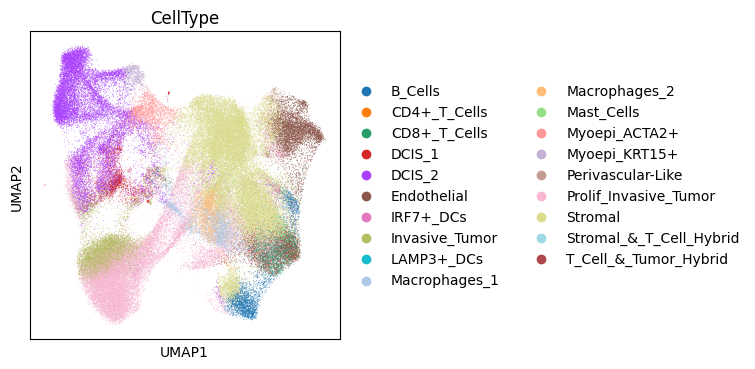

In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=[ "CellType"], wspace=0.4)

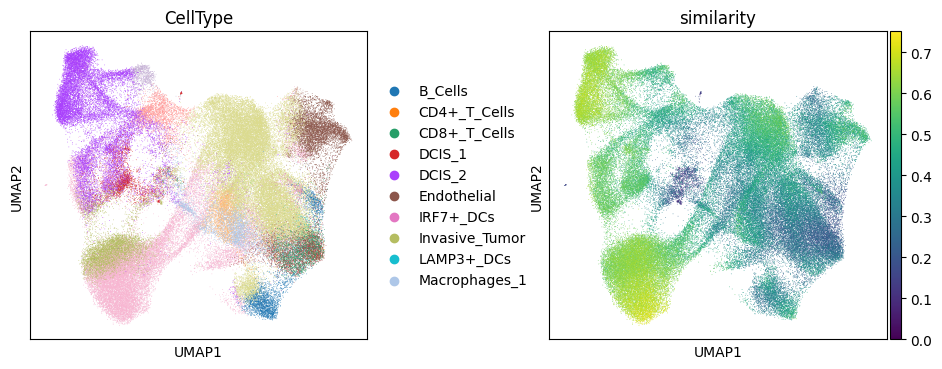

In [32]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "similarity"], wspace=0.4)

In [31]:
annotation_csv = pd.read_csv('../data/xenium/outs/insitu_replicate_1_annotation.csv')
annotation_csv

Barcode         Cluster
0             1          DCIS_1
1             2          DCIS_1
2             3       Unlabeled
3             4  Invasive_Tumor
4             5          DCIS_1
...         ...             ...
167775   167776          DCIS_2
167776   167777          DCIS_1
167777   167778          DCIS_2
167778   167779          DCIS_1
167779   167780          DCIS_2

[167780 rows x 2 columns]

In [32]:
annotation_csv[annotation_csv['Barcode']==134602]

Barcode  Cluster
134601   134602  Stromal

In [33]:
annotation_unlabeled = annotation_csv[annotation_csv['Cluster'] == 'Unlabeled']['Barcode'].values
annotation_unlabeled

array([     3,      6,      7, ..., 167622, 167623, 167772])

In [34]:
import geopandas as gpd
joined = gpd.read_file('../data/xenium/outs/final_adatas/filtered_gdf_voronoi_tresholded.geojson')

In [35]:
joined

id   cell_id                                           geometry
0       ID_100000  142883.0  POLYGON ((23417.72787 13082.53794, 23436.60986...
1       ID_100001  141638.0  POLYGON ((22649.14015 12853.50136, 22644.15915...
2       ID_100002  133378.0  POLYGON ((20755.92947 12329.60917, 20745.38917...
3       ID_100004  141054.0  POLYGON ((23155.80224 12877.18573, 23150.04510...
4       ID_100006  141241.0  POLYGON ((22934.10944 13176.29882, 22932.63922...
...           ...       ...                                                ...
107859   ID_99993  141635.0  POLYGON ((22579.11728 12805.14205, 22573.33138...
107860   ID_99996  141055.0  POLYGON ((23150.88257 12916.10751, 23162.68254...
107861   ID_99997  134602.0  POLYGON ((20674.55286 11047.65616, 20694.76161...
107862   ID_99998  145875.0  POLYGON ((22808.54139 12187.25002, 22797.67689...
107863   ID_99999  141171.0  POLYGON ((22168.46877 12617.85196, 22158.30383...

[107864 rows x 3 columns]

In [36]:
adata.obs.reset_index(drop=True, inplace=True)

In [37]:
adata.obs['id'] = adata.obs['id'].values

In [38]:
# Ensure IDs are of the same type
joined['id'] = joined['id'].astype(str)
adata.obs['id'] = adata.obs['id'].astype(str)

# Filter joined to only include rows with ids present in adata.obs['id']
filtered_joined = joined[joined['id'].isin(adata.obs['id'])]

# Drop duplicates based on the 'id' column

# Check the resulting DataFrame
print(filtered_joined)


               id   cell_id                                           geometry
0       ID_100000  142883.0  POLYGON ((23417.72787 13082.53794, 23436.60986...
1       ID_100001  141638.0  POLYGON ((22649.14015 12853.50136, 22644.15915...
2       ID_100002  133378.0  POLYGON ((20755.92947 12329.60917, 20745.38917...
3       ID_100004  141054.0  POLYGON ((23155.80224 12877.18573, 23150.04510...
4       ID_100006  141241.0  POLYGON ((22934.10944 13176.29882, 22932.63922...
...           ...       ...                                                ...
107859   ID_99993  141635.0  POLYGON ((22579.11728 12805.14205, 22573.33138...
107860   ID_99996  141055.0  POLYGON ((23150.88257 12916.10751, 23162.68254...
107861   ID_99997  134602.0  POLYGON ((20674.55286 11047.65616, 20694.76161...
107862   ID_99998  145875.0  POLYGON ((22808.54139 12187.25002, 22797.67689...
107863   ID_99999  141171.0  POLYGON ((22168.46877 12617.85196, 22158.30383...

[107864 rows x 3 columns]


In [39]:
filtered_joined

id   cell_id                                           geometry
0       ID_100000  142883.0  POLYGON ((23417.72787 13082.53794, 23436.60986...
1       ID_100001  141638.0  POLYGON ((22649.14015 12853.50136, 22644.15915...
2       ID_100002  133378.0  POLYGON ((20755.92947 12329.60917, 20745.38917...
3       ID_100004  141054.0  POLYGON ((23155.80224 12877.18573, 23150.04510...
4       ID_100006  141241.0  POLYGON ((22934.10944 13176.29882, 22932.63922...
...           ...       ...                                                ...
107859   ID_99993  141635.0  POLYGON ((22579.11728 12805.14205, 22573.33138...
107860   ID_99996  141055.0  POLYGON ((23150.88257 12916.10751, 23162.68254...
107861   ID_99997  134602.0  POLYGON ((20674.55286 11047.65616, 20694.76161...
107862   ID_99998  145875.0  POLYGON ((22808.54139 12187.25002, 22797.67689...
107863   ID_99999  141171.0  POLYGON ((22168.46877 12617.85196, 22158.30383...

[107864 rows x 3 columns]

In [40]:
adata.obs = adata.obs.merge(filtered_joined[['id', 'cell_id']], on='id', how='left')

# Now adata.obs has a new 'cell_id' column
print(adata.obs.head())

          id  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
0  ID_100000                 94                 4.553877         218.0  \
1  ID_100001                 79                 4.382027         394.0   
2  ID_100002                 46                 3.850148          87.0   
3  ID_100004                 80                 4.394449         305.0   
4  ID_100006                 55                 4.025352         117.0   

   log1p_total_counts  pct_counts_in_top_50_genes   
0            5.389072                   79.816514  \
1            5.978886                   92.639594   
2            4.477337                  100.000000   
3            5.723585                   88.524590   
4            4.770685                   95.726496   

   pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
0                        100.0                        100.0  \
1                        100.0                        100.0   
2                        100.0                 

In [41]:
annotation_csv[annotation_csv['Barcode']==4]

Barcode         Cluster
3        4  Invasive_Tumor

In [42]:
annotation_csv

Barcode         Cluster
0             1          DCIS_1
1             2          DCIS_1
2             3       Unlabeled
3             4  Invasive_Tumor
4             5          DCIS_1
...         ...             ...
167775   167776          DCIS_2
167776   167777          DCIS_1
167777   167778          DCIS_2
167778   167779          DCIS_1
167779   167780          DCIS_2

[167780 rows x 2 columns]

In [43]:
adata

AnnData object with n_obs × n_vars = 107864 × 313
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'CellType', 'similarity', 'cell_id'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [44]:
annotation_csv['Barcode'] = annotation_csv['Barcode'].astype(float)

In [45]:
annotation_csv['Barcode']

0              1.0
1              2.0
2              3.0
3              4.0
4              5.0
            ...   
167775    167776.0
167776    167777.0
167777    167778.0
167778    167779.0
167779    167780.0
Name: Barcode, Length: 167780, dtype: float64

In [46]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(float)

In [47]:
# Perform the merge
merged_df = adata.obs.merge(annotation_csv, left_on='cell_id', right_on='Barcode', how='left')


In [48]:
adata.obs['realCellType'] = merged_df['Cluster']

In [49]:
adata.obs[adata.obs['cell_id']=='4']

Empty DataFrame
Columns: [id, n_genes_by_counts, log1p_n_genes_by_counts, total_counts, log1p_total_counts, pct_counts_in_top_50_genes, pct_counts_in_top_100_genes, pct_counts_in_top_200_genes, pct_counts_in_top_500_genes, clusters, CellType, similarity, cell_id, realCellType]
Index: []

In [50]:
# Filter out rows in adata where 'cell_id' is in the unlabeled_cell_ids list
adata = adata[~adata.obs['cell_id'].isin(annotation_unlabeled)]

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


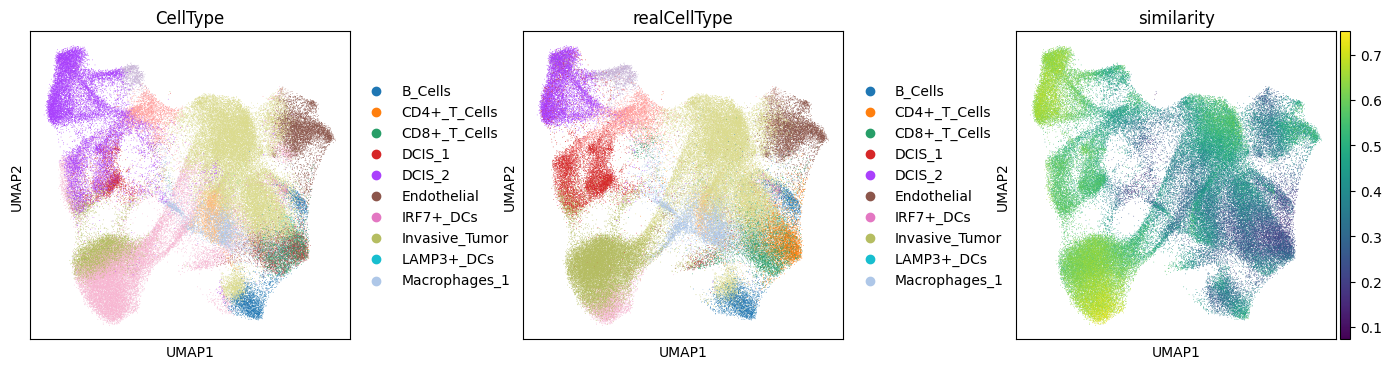

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "realCellType", 'similarity'], wspace=0.4)

In [53]:
adata.obs

id  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
0       ID_100000                 94                 4.553877         218.0  \
1       ID_100001                 79                 4.382027         394.0   
2       ID_100002                 46                 3.850148          87.0   
3       ID_100004                 80                 4.394449         305.0   
4       ID_100006                 55                 4.025352         117.0   
...           ...                ...                      ...           ...   
107859   ID_99993                 87                 4.477337         461.0   
107860   ID_99996                 82                 4.418841         279.0   
107861   ID_99997                 62                 4.143135         117.0   
107862   ID_99998                 75                 4.330733         254.0   
107863   ID_99999                 74                 4.317488         141.0   

        log1p_total_counts  pct_counts_in_top_50_genes   
0                 5.389072                   79.816514  \
1                 5.978886                   92.639594   
2                 4.477337                  100.000000   
3                 5.723585                   88.524590   
4                 4.770685                   95.726496   
...                    ...                         ...   
107859            6.135565                   91.323210   
107860            5.634790                   88.530466   
107861            4.770685                   89.743590   
107862            5.541264                   90.157480   
107863            4.955827                   82.978723   

        pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
0                             100.0                        100.0  \
1                             100.0                        100.0   
2                             100.0                        100.0   
3                             100.0                        100.0   
4                             100.0                        100.0   
...                             ...                          ...   
107859                        100.0                        100.0   
107860                        100.0                        100.0   
107861                        100.0                        100.0   
107862                        100.0                        100.0   
107863                        100.0                        100.0   

        pct_counts_in_top_500_genes clusters       CellType  similarity   
0                             100.0        6    Endothelial    0.386116  \
1                             100.0        4         DCIS_2    0.639297   
2                             100.0        6        Stromal    0.411456   
3                             100.0        7         DCIS_2    0.597167   
4                             100.0        2        Stromal    0.306086   
...                             ...      ...            ...         ...   
107859                        100.0        4         DCIS_2    0.618582   
107860                        100.0        7         DCIS_2    0.522736   
107861                        100.0        1        Stromal    0.327820   
107862                        100.0        4         DCIS_2    0.638100   
107863                        100.0        7  Myoepi_KRT15+    0.386793   

         cell_id   realCellType  
0       142883.0        Stromal  
1       141638.0         DCIS_2  
2       133378.0        Stromal  
3       141054.0         DCIS_2  
4       141241.0        Stromal  
...          ...            ...  
107859  141635.0         DCIS_2  
107860  141055.0  Myoepi_KRT15+  
107861  134602.0        Stromal  
107862  145875.0         DCIS_2  
107863  141171.0  Myoepi_KRT15+  

[103853 rows x 14 columns]

In [54]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(adata.obs['CellType'], adata.obs['realCellType'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5182207663338105


In [55]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(str)
filtered_joined['cell_id'] = filtered_joined['cell_id'].astype(str)

In [56]:
filtered_joined_with_types = filtered_joined.merge(
    adata.obs[['cell_id', 'CellType', 'realCellType']],
    on='cell_id',
    how='left'
)

# Check the resulting GeoDataFrame
print(filtered_joined_with_types)

               id   cell_id   
0       ID_100000  142883.0  \
1       ID_100001  141638.0   
2       ID_100002  133378.0   
3       ID_100004  141054.0   
4       ID_100006  141241.0   
...           ...       ...   
107859   ID_99993  141635.0   
107860   ID_99996  141055.0   
107861   ID_99997  134602.0   
107862   ID_99998  145875.0   
107863   ID_99999  141171.0   

                                                 geometry       CellType   
0       POLYGON ((23417.72787 13082.53794, 23436.60986...    Endothelial  \
1       POLYGON ((22649.14015 12853.50136, 22644.15915...         DCIS_2   
2       POLYGON ((20755.92947 12329.60917, 20745.38917...        Stromal   
3       POLYGON ((23155.80224 12877.18573, 23150.04510...         DCIS_2   
4       POLYGON ((22934.10944 13176.29882, 22932.63922...        Stromal   
...                                                   ...            ...   
107859  POLYGON ((22579.11728 12805.14205, 22573.33138...         DCIS_2   
107860  POLYGON ((2

In [57]:
filtered_joined_with_types.crs = None


In [58]:
filtered_joined_with_types = filtered_joined_with_types[
    ~((filtered_joined_with_types['CellType'] == 'nan') | 
      (filtered_joined_with_types['realCellType'] == 'nan'))
]

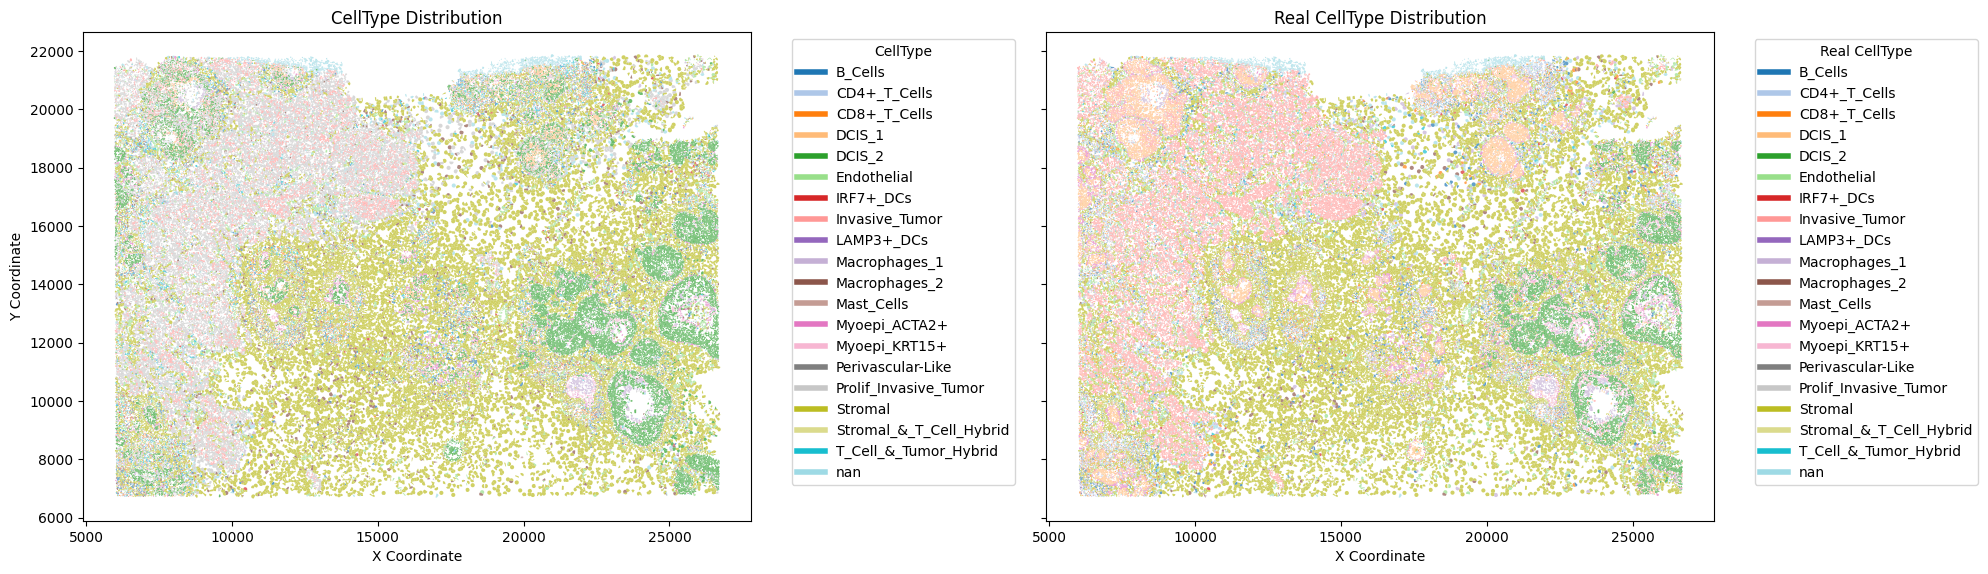

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_joined_with_types['CellType'].unique()
real_cell_type_categories = filtered_joined_with_types['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# Plot by 'CellType'
filtered_joined_with_types.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_joined_with_types['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].legend(handles=handles, labels=all_categories, title='CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot by 'realCellType'
filtered_joined_with_types.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_joined_with_types['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].legend(handles=handles, labels=all_categories, title='Real CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [60]:
filtered_gdf = filtered_joined_with_types

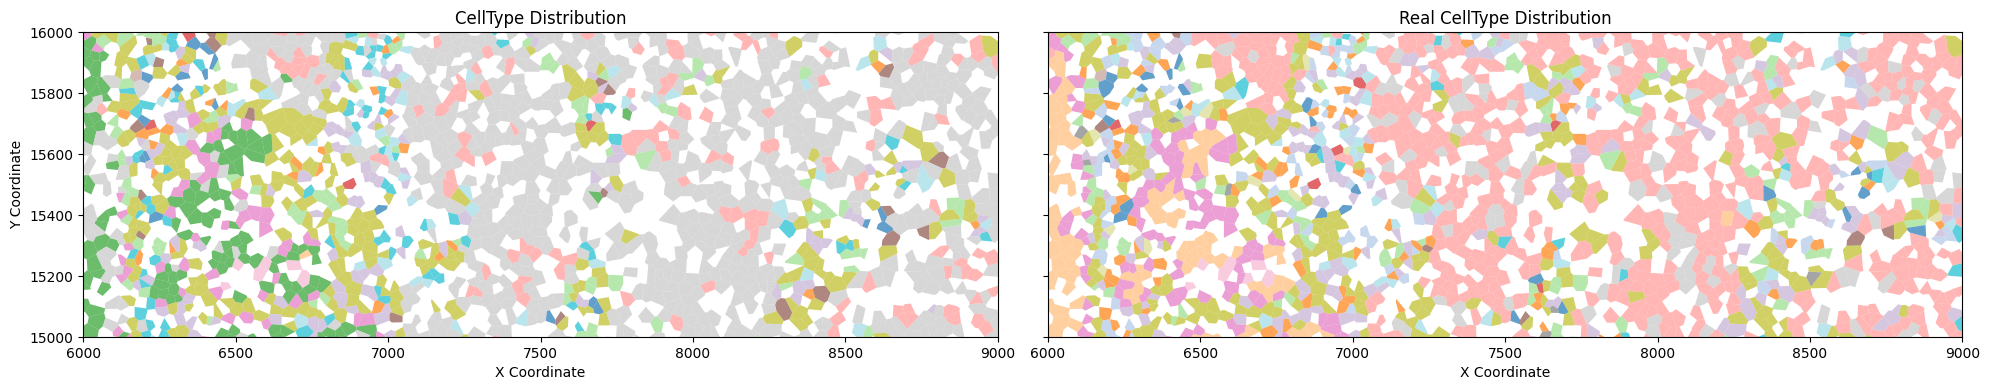

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_gdf['CellType'] = filtered_gdf['CellType'].astype(str)
filtered_gdf['realCellType'] = filtered_gdf['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_gdf['CellType'].unique()
real_cell_type_categories = filtered_gdf['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# Define your zoom area (bounding box coordinates)
xmin, xmax, ymin, ymax = 6000, 9000, 15000, 16000  # Adjust these values as needed

# Plot by 'CellType'
filtered_gdf.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_gdf['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[0].set_ylim(ymin, ymax)  # Set y-axis limits for zoom

# Plot by 'realCellType'
filtered_gdf.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_gdf['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[1].set_ylim(ymin, ymax)  # Set y-axis limits for zoom
# Adjust layout and display
plt.tight_layout()
plt.show()


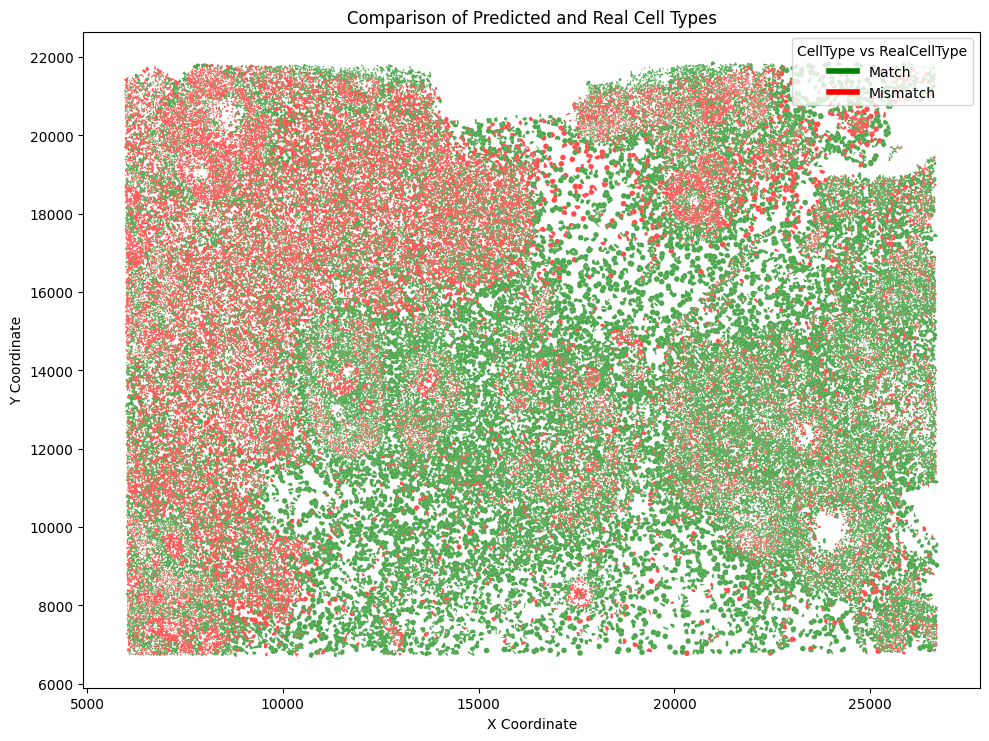

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Add a new column to indicate where CellType matches realCellType
filtered_joined_with_types['Match'] = filtered_joined_with_types['CellType'] == filtered_joined_with_types['realCellType']

# Define colors for matching (green) and non-matching (red)
match_colors = {True: 'green', False: 'red'}

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygons with colors based on the Match column
filtered_joined_with_types.plot(
    ax=ax,
    color=[match_colors[match] for match in filtered_joined_with_types['Match']],
    alpha=0.7
)

# Create custom legend
handles = [Line2D([0], [0], color='green', lw=4, label='Match'),
           Line2D([0], [0], color='red', lw=4, label='Mismatch')]

ax.legend(handles=handles, title='CellType vs RealCellType')

# Set title and labels
ax.set_title('Comparison of Predicted and Real Cell Types')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [63]:
adata.write("../data/xenium/outs/final_adatas/adata_voronoi_binning_tresholded_stats.h5ad")